#1.임포트하기

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
import keras

#2.데이터가져오기

In [3]:
! wget https://raw.githubusercontent.com/devdio/datasets/refs/heads/main/pollution_dataset.csv

--2025-01-02 08:35:58--  https://raw.githubusercontent.com/devdio/datasets/refs/heads/main/pollution_dataset.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 242391 (237K) [text/plain]
Saving to: ‘pollution_dataset.csv’

pollution_dataset.c 100%[===================>] 236.71K  1.51MB/s    in 0.2s    

2025-01-02 08:35:58 (1.51 MB/s) - ‘pollution_dataset.csv’ saved [242391/242391]



In [5]:
df = pd.read_csv('/content/pollution_dataset.csv')
# 결측치 없음
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Temperature                    5000 non-null   float64
 1   Humidity                       5000 non-null   float64
 2   PM2.5                          5000 non-null   float64
 3   PM10                           5000 non-null   float64
 4   NO2                            5000 non-null   float64
 5   SO2                            5000 non-null   float64
 6   CO                             5000 non-null   float64
 7   Proximity_to_Industrial_Areas  5000 non-null   float64
 8   Population_Density             5000 non-null   int64  
 9   Air Quality                    5000 non-null   object 
dtypes: float64(8), int64(1), object(1)
memory usage: 390.8+ KB


In [6]:
df.head()

,Temperature,Humidity,PM2.5,PM10,NO2,SO2,CO,Proximity_to_Industrial_Areas,Population_Density,Air Quality
0,29.8,59.1,5.2,17.9,18.9,9.2,1.72,6.3,319,Moderate
1,28.3,75.6,2.3,12.2,30.8,9.7,1.64,6.0,611,Moderate
2,23.1,74.7,26.7,33.8,24.4,12.6,1.63,5.2,619,Moderate
3,27.1,39.1,6.1,6.3,13.5,5.3,1.15,11.1,551,Good
4,26.5,70.7,6.9,16.0,21.9,5.6,1.01,12.7,303,Good


In [10]:
df.columns = [col.replace(' ','_') for col in df.columns]
df

,Temperature,Humidity,PM2.5,PM10,NO2,SO2,CO,Proximity_to_Industrial_Areas,Population_Density,Air_Quality
0,29.8,59.1,5.2,17.9,18.9,9.2,1.72,6.3,319,Moderate
1,28.3,75.6,2.3,12.2,30.8,9.7,1.64,6.0,611,Moderate
2,23.1,74.7,26.7,33.8,24.4,12.6,1.63,5.2,619,Moderate
3,27.1,39.1,6.1,6.3,13.5,5.3,1.15,11.1,551,Good
4,26.5,70.7,6.9,16.0,21.9,5.6,1.01,12.7,303,Good
...,...,...,...,...,...,...,...,...,...,...
4995,40.6,74.1,116.0,126.7,45.5,25.7,2.11,2.8,765,Hazardous
4996,28.1,96.9,6.9,25.0,25.3,10.8,1.54,5.7,709,Moderate
4997,25.9,78.2,14.2,22.1,34.8,7.8,1.63,9.6,379,Moderate
4998,25.3,44.4,21.4,29.0,23.7,5.7,0.89,11.6,241,Good


In [9]:
# 이상치는 없는 것 같음
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Temperature,5000.0,30.029020,6.720661,13.40,25.10,29.00,34.000,58.60
Humidity,5000.0,70.056120,15.863577,36.00,58.30,69.80,80.300,128.10
PM2.5,5000.0,20.142140,24.554546,0.00,4.60,12.00,26.100,295.00
PM10,5000.0,30.218360,27.349199,-0.20,12.30,21.70,38.100,315.80
NO2,5000.0,26.412100,8.895356,7.40,20.10,25.30,31.900,64.90
SO2,5000.0,10.014820,6.750303,-6.20,5.10,8.00,13.725,44.90
CO,5000.0,1.500354,0.546027,0.65,1.03,1.41,1.840,3.72
Proximity_to_Industrial_Areas,5000.0,8.425400,3.610944,2.50,5.40,7.90,11.100,25.80
Population_Density,5000.0,497.423800,152.754084,188.00,381.00,494.00,600.000,957.00


#3.X,y 데이터 나누기

In [11]:
X = df.drop('Air_Quality', axis = 1)
y = df['Air_Quality']

In [13]:
# 데이터 고르게 분포하고 있지만 Hazardous이 적음
y.value_counts()

,count
Air_Quality,
Good,2000
Moderate,1500
Poor,1000
Hazardous,500


In [14]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [15]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((4000, 9), (1000, 9), (4000,), (1000,))

#4.스케일링

In [16]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(X_train)
X_train_s = ss.transform(X_train)

#5.인코딩

In [17]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
le.fit(y_train)
y_train_e = le.transform(y_train)
y_train_e

array([0, 0, 0, ..., 3, 1, 0])

In [18]:
from keras.utils import to_categorical

y_train_o = to_categorical(y_train_e)
y_train_o[:5]

array([[1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [0., 0., 0., 1.],
       [0., 1., 0., 0.]])

#6.모델 학습

In [28]:
X_train_s.shape

(4000, 9)

In [32]:
from keras import layers

model = keras.Sequential([
    layers.Input((9,)),
    layers.Dense(units=16, activation='relu'),
    layers.Dense(units=8, activation='relu'),
    layers.Dense(units=4, activation='softmax')
    # 입력 쉐입, 출력 개수, 활성화 함수만 맞추면 오류 안남
])

model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_9 (Dense)                      │ (None, 16)                  │             160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 8)                   │             136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 4)                   │              36 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 332 (1.30 KB)

 Trainable params: 332 (1.30 KB)

 Non-trainable params: 0 (0.00 B)

In [33]:
model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics = ['acc']
)

In [34]:
epochs = 300
batch_size = 32

history = model.fit(
    X_train_s, y_train_o,
        epochs = epochs,
        batch_size=batch_size,
        validation_split=0.2
)

Epoch 1/300
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - acc: 0.4520 - loss: 1.1968 - val_acc: 0.7275 - val_loss: 0.8157
Epoch 2/300
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - acc: 0.7505 - loss: 0.7501 - val_acc: 0.8100 - val_loss: 0.5490
Epoch 3/300
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - acc: 0.8115 - loss: 0.5018 - val_acc: 0.8338 - val_loss: 0.4098
Epoch 4/300
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - acc: 0.8510 - loss: 0.3879 - val_acc: 0.8712 - val_loss: 0.3407
Epoch 5/300
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - acc: 0.8701 - loss: 0.3427 - val_acc: 0.8913 - val_loss: 0.3038
Epoch 6/300
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - acc: 0.8774 - loss: 0.3147 - val_acc: 0.9137 - val_loss: 0.2659
Epoch 7/300
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - acc: 0.8957 - loss: 0.2767 - val_acc: 0.9212 - val_loss: 0.2401
Epoch 8/300
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - acc: 0.9145 - loss: 0.2467 - val_acc: 0.9187 - val_loss: 0.2221
Epoch 9/300
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/

In [35]:
def plot_history(history):
  hist = pd.DataFrame(history.history)
  hist['epoch'] = history.epoch

  plt.figure(figsize=(16,8))
  plt.subplot(1,2,1)
  plt.xlabel('epoch')
  plt.ylabel('loss')
  plt.plot(hist['epoch'], hist['loss'], label='train_loss')
  plt.plot(hist['epoch'], hist['val_loss'], label='val_loss')
  plt.title('Loss Curve')
  plt.legend()

  plt.subplot(1,2,2)
  plt.xlabel('epoch')
  plt.ylabel('accuracy')
  plt.plot(hist['epoch'], hist['acc'], label='train_acc')
  plt.plot(hist['epoch'], hist['val_acc'], label='val_acc')
  plt.title('acc Curve')
  plt.legend()

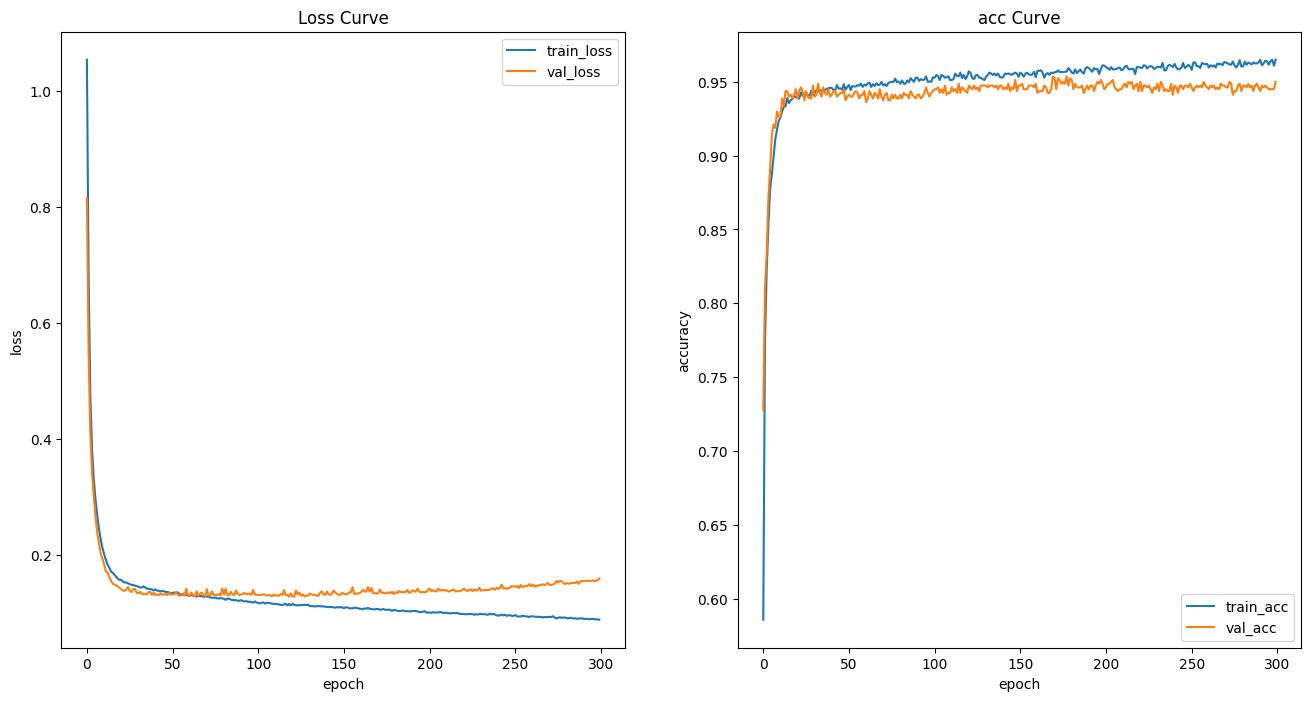

In [36]:
plot_history(history)

#7.테스트

In [37]:
X_test_s = ss.transform(X_test)

In [38]:
y_test_e = le.transform(y_test)

In [39]:
y_test_o = to_categorical(y_test_e)

In [40]:
y_pred = model.predict(X_test_s)
# 가장 큰 값을 가지는 인덱스를 리턴하도록
y_pred = np.argmax(y_pred, axis=1)
y_pred

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


array([2, 0, 0, 3, 2, 0, 3, 1, 3, 2, 2, 3, 0, 1, 2, 2, 0, 0, 2, 2, 0, 0,
       3, 0, 1, 2, 3, 0, 2, 3, 2, 3, 0, 1, 0, 3, 0, 1, 0, 3, 2, 2, 0, 2,
       3, 0, 0, 3, 3, 2, 2, 0, 3, 3, 0, 3, 2, 0, 0, 0, 3, 0, 2, 0, 2, 2,
       0, 3, 0, 2, 2, 2, 0, 0, 2, 2, 0, 2, 0, 0, 2, 2, 0, 3, 0, 2, 0, 0,
       2, 3, 0, 3, 0, 0, 2, 2, 2, 1, 0, 3, 2, 2, 0, 0, 0, 3, 3, 3, 2, 0,
       0, 0, 3, 3, 0, 1, 0, 3, 2, 0, 0, 3, 2, 0, 0, 3, 3, 0, 3, 2, 0, 2,
       3, 2, 3, 0, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 0, 2, 3, 3, 1, 2, 3, 0,
       2, 0, 2, 0, 0, 2, 2, 0, 3, 3, 1, 2, 2, 3, 0, 1, 0, 0, 2, 0, 2, 3,
       0, 3, 0, 2, 0, 3, 3, 3, 0, 0, 0, 2, 1, 0, 0, 1, 0, 2, 0, 0, 0, 2,
       0, 2, 0, 3, 2, 0, 0, 2, 0, 2, 1, 1, 0, 3, 0, 2, 1, 0, 3, 0, 0, 0,
       3, 3, 0, 1, 0, 3, 1, 3, 0, 2, 0, 0, 3, 3, 0, 3, 0, 0, 0, 0, 1, 2,
       2, 0, 0, 0, 3, 3, 0, 0, 1, 3, 0, 2, 0, 0, 0, 0, 3, 3, 2, 0, 1, 2,
       3, 0, 0, 2, 2, 0, 0, 2, 3, 2, 0, 2, 2, 2, 1, 3, 2, 1, 0, 3, 3, 3,
       0, 2, 1, 0, 2, 2, 2, 3, 2, 1, 2, 0, 0, 1, 3,

In [41]:
y_test_e

array([2, 0, 0, 3, 2, 0, 3, 1, 3, 3, 2, 3, 0, 3, 2, 2, 0, 0, 2, 2, 0, 0,
       2, 0, 1, 2, 3, 0, 2, 3, 2, 3, 0, 1, 0, 3, 0, 1, 0, 1, 3, 2, 0, 2,
       3, 0, 0, 3, 3, 2, 2, 0, 3, 3, 0, 3, 2, 0, 0, 0, 3, 0, 2, 0, 2, 2,
       0, 3, 0, 2, 3, 2, 0, 0, 2, 2, 0, 2, 0, 0, 2, 2, 0, 3, 0, 2, 0, 0,
       2, 3, 0, 3, 0, 0, 2, 2, 2, 1, 0, 3, 2, 2, 0, 0, 0, 3, 3, 3, 2, 0,
       0, 0, 1, 1, 0, 1, 0, 3, 2, 0, 0, 3, 2, 0, 0, 3, 3, 0, 3, 2, 0, 2,
       3, 2, 3, 0, 2, 2, 2, 1, 2, 1, 3, 2, 0, 2, 0, 2, 3, 3, 1, 2, 3, 0,
       3, 0, 3, 0, 0, 2, 2, 0, 3, 3, 1, 2, 2, 3, 0, 1, 0, 0, 2, 0, 2, 3,
       0, 3, 0, 2, 0, 3, 3, 1, 0, 0, 0, 2, 1, 0, 0, 1, 2, 2, 0, 0, 0, 2,
       0, 2, 0, 3, 2, 0, 0, 2, 0, 2, 1, 1, 0, 3, 0, 2, 1, 0, 3, 0, 0, 0,
       3, 3, 0, 1, 0, 3, 1, 1, 0, 2, 0, 0, 3, 1, 0, 3, 0, 0, 0, 0, 1, 2,
       2, 0, 0, 0, 1, 3, 0, 0, 1, 1, 0, 2, 0, 0, 0, 0, 3, 3, 2, 0, 1, 2,
       3, 0, 0, 2, 2, 0, 0, 2, 3, 2, 0, 2, 2, 2, 1, 3, 2, 1, 0, 1, 3, 3,
       2, 2, 1, 0, 2, 2, 2, 3, 2, 1, 2, 0, 0, 1, 3,

In [42]:
from sklearn.metrics import accuracy_score, recall_score
from sklearn.metrics import precision_score, f1_score
from sklearn.metrics import confusion_matrix

def print_metrics(y_true, y_pred):
  acc = accuracy_score(y_true, y_pred)
  re = recall_score(y_true, y_pred, average='macro')
  pre = precision_score(y_true, y_pred, average='macro')
  f1 = f1_score(y_true, y_pred, average='macro')

  print("acc:", acc)
  print("recall:", np.around(re, 4))
  print("precision:", np.around(pre, 4))
  print("f1:", np.around(f1, 4))

  cfm = confusion_matrix(y_true, y_pred)
  s = sns.heatmap(cfm, annot=True, cmap='Blues', fmt='d', cbar=False)
  s.set(xlabel='Prediction', ylabel='Actual')
  plt.show()

acc: 0.939
recall: 0.8998
precision: 0.9232
f1: 0.9095


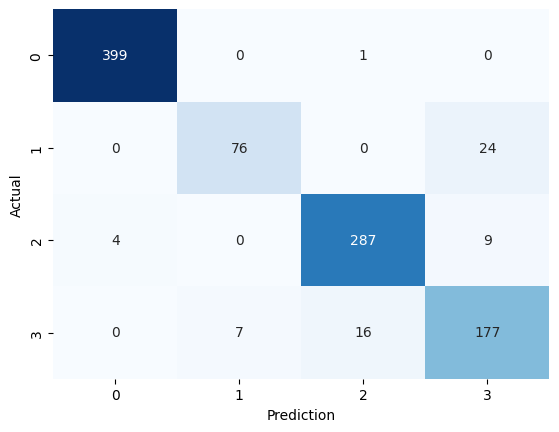

In [43]:
print_metrics(y_test_e, y_pred)